In [1]:
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline


## Using Halotools to create mock catalog

In [2]:
from halotools.empirical_models import PrebuiltHodModelFactory, PrebuiltSubhaloModelFactory
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import wp
from halotools.sim_manager import CachedHaloCatalog
from scipy import interpolate


In [3]:
import halotools
## Test only done once
#halotools.test()

In [4]:
# Done each time a new catalog wishes to be used...
from halotools.sim_manager import DownloadManager
dman = DownloadManager()
dman.download_processed_halo_table('bolplanck', 'rockstar', 0.5) 
dman.download_processed_halo_table('bolplanck', 'rockstar', 0) 
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0.5) 
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0) 
### NOTE: bolshoi=WMAP5 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.
### NOTE: bolplanck=Planck 2013 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.

C:\Users\mxo431\Anaconda3\lib\site-packages\halotools\sim_manager\download_manager.py:933: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 933 of the file C:\Users\mxo431\Anaconda3\lib\site-packages\halotools\sim_manager\download_manager.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(requests.get(baseurl).text)
C:\Users\mxo431\Anaconda3\lib\site-packages\halotools\sim_manager\download_manager.py:942: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual env

HalotoolsError: 
There already exists a halo catalog in your cache log with 
specifications that exactly match your inputs.
If you want to overwrite this catalog with your download, 
you must set the ``overwrite`` keyword argument to True. 
Alternatively, you can delete the log entry using the 
remove_entry_from_cache_log method of the HaloTableCache class.


In [4]:
halocat = CachedHaloCatalog(simname = 'bolplanck', redshift = 0, halo_finder = 'rockstar')
halos = halocat.halo_table

In [5]:
x = halos['halo_x']
y = halos['halo_y']
z = halos['halo_z']
all_positions = return_xyz_formatted_array(x, y, z)
#rpbins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
rpbins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80])

wdm0 = wp(all_positions, rpbins, 60,period=halocat.Lbox, num_threads=4,estimator='Davis-Peebles')

In [7]:
## DIDINT RUN THIS
x = halos['halo_x']
y = halos['halo_y']
z = halos['halo_z']
all_positions = return_xyz_formatted_array(x, y, z)
#rpbins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
rpbins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80])

wdm0 = wp(all_positions, rpbins, 60,period=halocat.Lbox, num_threads=4,estimator='Davis-Peebles')

In [7]:
##what's going on with the bins??
rpbins80 = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80])
rpbins100 = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
#print(rpbins)
rp_bin_centers80 = (rpbins80[:1] + rpbins80[1:])/2.
print(rp_bin_centers80)
print('HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH')
rp_bin_centers100 = (rpbins100[:1] + rpbins100[1:])/2.
print(rp_bin_centers100)


[ 0.3   0.55  1.55  3.05  4.05  5.05  7.55 10.05 15.05 20.05 25.05 30.05
 40.05]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
[ 0.3   0.55  1.55  3.05  4.05  5.05  7.55 10.05 15.05 20.05 25.05 30.05
 40.05 50.05]


In [8]:
%%time
halocat5 = CachedHaloCatalog(simname = 'bolplanck', redshift = 0.5, halo_finder = 'rockstar')
halos5 = halocat5.halo_table

Wall time: 3.95 s


In [9]:
%%time
x5 = halos5['halo_x']
y5 = halos5['halo_y']
z5 = halos5['halo_z']
all_positions5 = return_xyz_formatted_array(x5, y5, z5)
##rpbins5 = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60])
wdm5 = wp(all_positions5, rpbins, 60,period=halocat5.Lbox, num_threads=4)

Wall time: 54min 33s


In [13]:
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolplanck_0_wp_dm.npy',wdm0)
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolplanck_0.5_wp_dm.npy',wdm5)
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolplanck_rp_used.npy',rpbins)

In [5]:
wdm0=np.load('output/bolshoi_0_wp_dm.npy')
wdm5=np.load('output/bolshoi_0.5_wp_dm.npy')
rpbins=np.load('output/bolshoi_rp_used.npy')


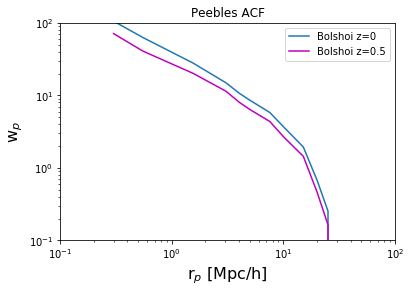

In [20]:

##plt.yscale("log", nonposy='clip')
##plt.xscale("log", nonposy='clip')

##plt.plot(rp_bin_centers,wdm0,label='Bolshoi z=0')
##plt.plot(rp_bin_centers,wdm5,color='m',label='Bolshoi z=0.5')
rp_bin_centers = (rpbins[:1] + rpbins[1:])/2.
plt.loglog(rp_bin_centers,wdm0,label='Bolshoi z=0')
plt.loglog(rp_bin_centers,wdm5,color='m',label='Bolshoi z=0.5')

plt.axis([.1,100,.1,100])
plt.legend(frameon=True,numpoints=1,loc=1)
plt.xlabel('r$_{p}$ [Mpc/h]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Peebles ACF')
plt.savefig('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/plots/corrfunctSFpeas.pdf')


In [15]:

print(wdm)
rpbins

[ 30.51441626  16.87175972  12.12543956   9.8556689    6.83392563
   4.45280993   2.41952342   0.91446521   0.38812959  -0.03417333]


array([ 1,  3,  6,  8, 10, 15, 20, 30, 40, 50, 60])